The full data is saved in file

all_open_models.npy

This is a python binary final and can be opened using np.load

The shape of the data array is

5,7,6,7,35

dimension
1: Abundances --- As relative to solar abundance 0.05,0.2,0.4,1, and 2. In python:
                    abundances = np.array([0.05,0.2,0.4,1,2])
2: Stellar Ages --- Stellar Ages in Myr (million years) from 1 Myr to 7 Myr. In python:
                    stellar_age = np.arange(1,8,1)
3: Hydrogen Gas Density --- log10(density) from 1 to 3.5 in steps of 0.5. In python:
                    densities = np.arange(1,4.0,0.5)
4: Ionizaton Parameter --- log10(ionization_parameter) from -4 to -1.0 in steps of 0.5. In python:
                    ionization_param = np.arange(-4,-0.5,0.5)
5: Data --- this contains the actually line fluxes and continuum fluxes calculated by the model. The different indices correspond to different lines as indicated below

Index                 Line Name
0                     'nFnu      20.4636c',  #1.5 GHz
1                     'nFnu      6.13700c',  #4.9 GHz
2                     'nFnu      3.43208c',  #8.7 GHz
3                     'nFnu      2.00329c',  #15.0 GHz
4                     'nFnu      1.33478c',  #23.1 GHz
5                     'nFnu      9993.08m',  #30 GHz
6                     'nFnu      6917.22m',  #43.3 GHz
7                     'FIR       83.0000m',
8                     'TIR       1800.00m',
9                     'NIRa      2.85000m',
10                    'NIRb      3.00000m',
11                    'MIRa      15.0000m',
12                    'MIRb      22.5000m',
13                    'NMIR      21.7500m',
14                    'TFIR      611.250m',
15                    'C  2      157.636m',
16                    'N  2      121.767m',
17                    'N  2      205.244m',
18                    'N  3      57.3238m',
19                    'O  1      63.1679m',
20                    'O  1      145.495m',
21                    'O  3      51.8004m',
22                    'O  3      88.3323m',
23                    'Ne 2      12.8101m',
24                    'Ne 3      15.5509m',
25                    'Ne 3      36.0036m',
26                    'Na 3      7.31706m',
27                    'Mg 4      4.48712m',
28                    'Si 2      34.8046m',
29                    'S  3      18.7078m',
30                    'S  3      33.4704m',
31                    'S  4      10.5076m',
32                    'Ar 2      6.98337m',
33                    'Ar 3      8.98898m',
34                    'Ar 3      21.8253m',

In [1]:
import numpy as np
import numpy as np
import numpy.ma as ma
import matplotlib.pylab as plt
from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table,join

import matplotlib.patches as mpatches
from astropy.cosmology import WMAP9
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import matplotlib.patheffects as PathEffects
from astropy import constants
from matplotlib.patches import Rectangle
from matplotlib import colors

In [24]:
open_models = np.load("all_open_models.npy")

(5, 7, 6, 7, 35)

In [25]:
lines = np.array([('nFnu      20.4636c'),  #1.5 GHz
                    ('nFnu      6.13700c'),  #4.9 GHz
                     ('nFnu      3.43208c'),  #8.7 GHz
                    ('nFnu      2.00329c'),  #15.0 GHz
                 ('nFnu      1.33478c'),  #23.1 GHz
                     ('nFnu      9993.08m'),  #30 GHz
                    ( 'nFnu      6917.22m'),  #43.3 GHz
                    ('FIR       83.0000m'),
                    ( 'TIR       1800.00m'),
                    ('NIRa      2.85000m'),
                    ('NIRb      3.00000m'),
                    ('MIRa      15.0000m'),                    'MIRb      22.5000m',
                    ('NMIR      21.7500m'),
                   ('TFIR      611.250m'),
                    ('C  2      157.636m'),
                   ('N  2      121.767m'),
                   ('N  2      205.244m'),
                   ('N  3      57.3238m'),
                  ('O  1      63.1679m'),
                  ('O  1      145.495m'),
                  ('O  3      51.8004m'),
                  ('O  3      88.3323m'),
                   ('Ne 2      12.8101m'),
                 ('Ne 3      15.5509m'),
                    ('Ne 3      36.0036m'),
                   ('Na 3      7.31706m'),
                  ( 'Mg 4      4.48712m'),
                    ('Si 2      34.8046m'),
                    ('S  3      18.7078m'),
                    ('S  3      33.4704m'),
                    ('S  4      10.5076m'),
                    ('Ar 2      6.98337m'),
                    ('Ar 3      8.98898m'),
                   ('Ar 3      21.8253m')])

In [26]:
lines_IR = open_models[:,:,:,:,15:] 
lines_IR

array([[[[[-6.189, -6.675, -6.715, ..., -7.056, -6.768, -7.931],
          [-1.831, -6.228, -6.308, ..., -6.87 , -6.226, -7.385],
          [-1.838, -5.952, -6.052, ..., -6.704, -5.686, -6.841],
          ..., 
          [-1.83 , -5.701, -5.84 , ..., -6.476, -4.776, -5.922],
          [-1.908, -5.584, -5.756, ..., -6.373, -4.506, -5.649],
          [-1.83 , -5.426, -5.658, ..., -6.211, -4.339, -5.48 ]],

         [[-1.673, -6.209, -6.463, ..., -6.577, -6.278, -7.441],
          [-1.829, -5.766, -6.064, ..., -6.37 , -5.726, -6.885],
          [-1.804, -5.499, -5.818, ..., -6.204, -5.186, -6.341],
          ..., 
          [-1.765, -5.267, -5.631, ..., -5.976, -4.276, -5.422],
          [-1.789, -5.165, -5.568, ..., -5.874, -4.006, -5.149],
          [-1.834, -5.041, -5.501, ..., -5.715, -3.842, -4.984]],

         [[-1.644, -5.86 , -6.333, ..., -6.077, -5.778, -6.942],
          [-1.672, -5.435, -5.978, ..., -5.87 , -5.225, -6.385],
          [-1.686, -5.177, -5.746, ..., -5.704, -4.687

In [27]:
np.shape(lines_IR)

(5, 7, 6, 7, 20)

In [28]:
lines_IR_names = lines[15:]
line_wavelength = [157.6,63.17,145.5,121.7,205.4,57.21,88.33,51.80] #microns
wavelength = [0.0083,0.0025,0.0060,0.0100,0.6917,0.9993,1.335,2.003,3.432,6.137,20.46]
frequency = 3e10/np.array(wavelength)

In [29]:
lines_IR_names[0].split('      ')
#float(lines_IR_names[0].split()[2][:-1])
line_wavelength=np.zeros(len(lines_IR_names))
i = 0
for line in lines_IR_names:
    line_wavelength[i]=float(line.split()[2][:-1])
    i=i+1
    
line_wavelength

array([ 157.636  ,  121.767  ,  205.244  ,   57.3238 ,   63.1679 ,
        145.495  ,   51.8004 ,   88.3323 ,   12.8101 ,   15.5509 ,
         36.0036 ,    7.31706,    4.48712,   34.8046 ,   18.7078 ,
         33.4704 ,   10.5076 ,    6.98337,    8.98898,   21.8253 ])

In [30]:
nii_205 = 10**lines_IR[:,:,:,:,2]
nii = 10**lines_IR[:,:,:,:,1]
oiii_88 = 10**lines_IR[:,:,:,:,7]
cii = 10**lines_IR[:,:,:,:,0]

abundances = np.array([0.05,0.2,0.4,1,2])
stellar_age = np.arange(1,8,1)
densities = np.arange(1,4.0,0.5)
ionization_param = np.arange(-4,-0.5,0.5)

Snu_5ghz = 10**open_models[:,:,:,:,1]
Snu_8ghz = 10**open_models[:,:,:,:,2]
nii_5GHz = nii/Snu_5ghz
nii_205_5GHz = nii_205/Snu_5ghz
oiii_88_5GHz = oiii_88/Snu_5ghz
cii_5GHz = cii/Snu_5ghz

print("Snu_5ghz",np.shape(Snu_5ghz))
print("Snu_8ghz",np.shape(Snu_8ghz))
print("nii_5GHz",np.shape(nii_5GHz))
print("oiii_88_5GHz",np.shape(oiii_88_5GHz))
print("cii_5GHz",np.shape(cii_5GHz))


Snu_5ghz (5, 7, 6, 7)
Snu_8ghz (5, 7, 6, 7)
nii_5GHz (5, 7, 6, 7)
oiii_88_5GHz (5, 7, 6, 7)
cii_5GHz (5, 7, 6, 7)


In [9]:
nii_5GHz

masked_array(data =
 [[[[102.32929922807557 0.5807644175213124 1.2050359403717985 ...,
    2.275097430772072 1.931968317016926 1.1428783347897713]
   [1.435489433353656 4.159106104940219 7.046930689671481 ...,
    4.528975799036204 2.1877616239495516 0.9638290236239705]
   [4.036453929676049 9.036494737223023 11.350108156723167 ...,
    3.622429984166988 1.4321878992735424 0.5546257129579116]
   [4.70977326396953 8.51138038202376 8.260379495771783 ...,
    1.8113400926196024 0.668343917568615 0.2697739432444921]
   [3.0199517204020188 4.570881896148752 3.7844258471709358 ...,
    0.7211074791828991 0.27669416454115126 0.15812480392703843]
   [1.4893610777109154 1.9633602768360474 1.4655478409559126 ...,
    0.2747894153102397 0.14157937799570822 0.18663796908346694]]

  [[102.32929922807557 0.579428696426881 1.202264434617413 ...,
    2.264644307593062 1.9364219639466105 1.145512941445536]
   [1.435489433353656 4.1495404263436235 7.014552984199714 ...,
    4.518559443749226 2.182729911

In [31]:
markers=['o','s','^','*','d','x','D']
colors = ['m','y','c','r','b','g','grey']
linestyles = ['-','--',':','-.','-','--',':']

In [12]:
plt.figure(2)
plt.plot(abundances,cii[:,0,0,0],marker=markers[age],
                   linestyle=linestyles[age],alpha=0.8,color=colors[ionization])
plt.show()

NameError: name 'age' is not defined

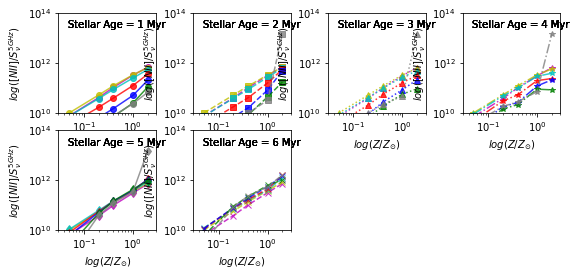

In [32]:
for dens in np.arange(len(densities)):
    fig = plt.figure(1,figsize=(9,4))
    fig.clf() #clears the current figure
    fig.subplots_adjust(hspace=.175,wspace=.375)
    for age in np.arange(len(stellar_age)-1):
        figure_number = age +1
        ax1 = plt.subplot(2,4,figure_number)
        ax1.set_ylabel(r'$log([NII]/S_{\nu}^{5 GHz})$')
        ax1.set_xlabel(r'$log(Z/Z_{\odot})$')
        plt.xlim(3e-2,3e0)
        plt.ylim(1e10,1e14)
        for ionization in np.arange(len(ionization_param)):
            ax1.loglog(abundances,nii_5GHz[:,age,dens,ionization]*frequency[9],marker=markers[age],
                       linestyle=linestyles[age],alpha=0.8,color=colors[ionization])
            ax1.annotate("Stellar Age = %i Myr" %stellar_age[age],(0.1,0.85),xycoords='axes fraction')
plt.savefig('OUTLIER_cloudy_open_nii_5ghz_HertzUNITS_hden%f.png' %densities[dens],dpi=300,bbox_inches='tight',pad_inches=0.5)
plt.show()

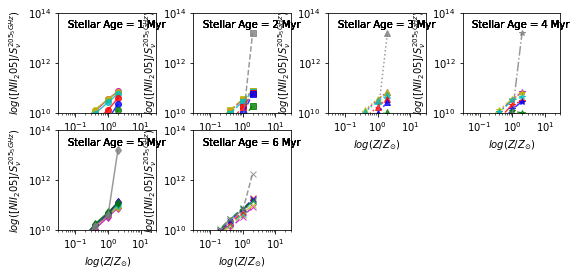

In [33]:
for dens in np.arange(len(densities)):
    fig = plt.figure(1,figsize=(9,4))
    fig.clf() #clears the current figure
    fig.subplots_adjust(hspace=.175,wspace=.375)
    for age in np.arange(len(stellar_age)-1):
        figure_number = age +1
        ax1 = plt.subplot(2,4,figure_number)
        ax1.set_ylabel(r'$log([NII_205]/S_{\nu}^{205_5 GHz})$')
        ax1.set_xlabel(r'$log(Z/Z_{\odot})$')
        plt.xlim(3e-2,3e1)
        plt.ylim(1e10,1e14)
        for ionization in np.arange(len(ionization_param)):
            ax1.loglog(abundances,nii_205_5GHz[:,age,dens,ionization]*frequency[9],marker=markers[age],
                       linestyle=linestyles[age],alpha=0.8,color=colors[ionization])
            ax1.annotate("Stellar Age = %i Myr" %stellar_age[age],(0.1,0.85),xycoords='axes fraction')
plt.savefig('OUTLIER_cloudy_open_nii_205_5ghz_HertzUNITS_hden%f.png' %densities[dens],dpi=300,bbox_inches='tight',pad_inches=0.5)
plt.show()

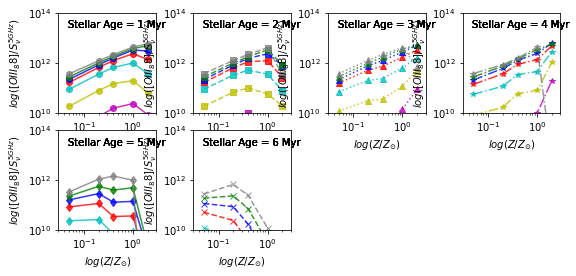

In [34]:
for dens in np.arange(len(densities)):
    fig = plt.figure(1,figsize=(9,4))
    fig.clf() #clears the current figure
    fig.subplots_adjust(hspace=.175,wspace=.375)
    for age in np.arange(len(stellar_age)-1):
        figure_number = age +1
        ax1 = plt.subplot(2,4,figure_number)
        ax1.set_ylabel(r'$log([OIII_88]/S_{\nu}^{5 GHz})$')
        ax1.set_xlabel(r'$log(Z/Z_{\odot})$')
        plt.xlim(3e-2,3e0)
        plt.ylim(1e10,1e14)
        for ionization in np.arange(len(ionization_param)):
            ax1.loglog(abundances,oiii_88_5GHz[:,age,dens,ionization]*frequency[9],marker=markers[age],
                       linestyle=linestyles[age],alpha=0.8,color=colors[ionization])
            ax1.annotate("Stellar Age = %i Myr" %stellar_age[age],(0.1,0.85),xycoords='axes fraction')
plt.savefig('OUTLIER_cloudy_open_oiii_88_5ghz_HertzUNITS_hden%f.png' %densities[dens],dpi=300,bbox_inches='tight',pad_inches=0.5)
plt.show()

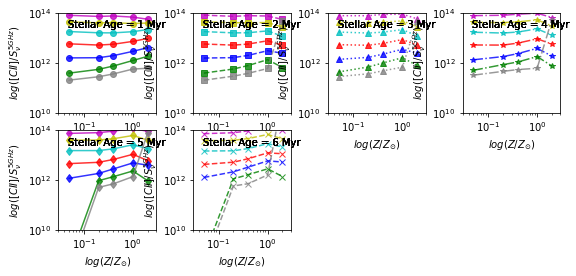

In [35]:
for dens in np.arange(len(densities)):
    fig = plt.figure(1,figsize=(9,4))
    fig.clf() #clears the current figure
    fig.subplots_adjust(hspace=.175,wspace=.375)
    for age in np.arange(len(stellar_age)-1):
        figure_number = age +1
        ax1 = plt.subplot(2,4,figure_number)
        ax1.set_ylabel(r'$log([CII]/S_{\nu}^{5 GHz})$')
        ax1.set_xlabel(r'$log(Z/Z_{\odot})$')
        plt.xlim(3e-2,3e0)
        plt.ylim(1e10,1e14)
        for ionization in np.arange(len(ionization_param)):
            ax1.loglog(abundances,cii_5GHz[:,age,dens,ionization]*frequency[9],marker=markers[age],
                       linestyle=linestyles[age],alpha=0.8,color=colors[ionization])
            ax1.annotate("Stellar Age = %i Myr" %stellar_age[age],(0.1,0.85),xycoords='axes fraction')
plt.savefig('OUTLIER_cloudy_open_CII_5ghz_HertzUNITS_hden%f.png' %densities[dens],dpi=300,bbox_inches='tight',pad_inches=0.5)
plt.show()